<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

ASSIGNMENT - SESSION 11 - K Means Clustering

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>

# 11.1 Theory Review

## 11.1.1 [1 Point] K-means Clustering
- Describe k-means clustering in TEFPA framework. Why does it belong to "Unsupervised Learning" type of ML algorithm? 
- Mô tả giải thuật k-means theo mô hình TEFPA: từng thành phần là gì? Vì sao lại coi k-means là giải thuật học máy "ko giám sát"?

**Answers**:
- Clustering with K-means algorithm
  - Task: $D=\{\mathbf{x}_t\}_{t=1}^N\overset{f}{\to}$ $K$ cluster centroids $\{\mathbf{x}^c_i\}_{i=1}^K$ + nearest centroid assignments.
  - Experience: only inputs $D=\{\mathbf{x}_t\}_{t=1}^N$; no labels hence *unsupervised learning*.
  - Function space: distance functions, i.e., Euclidean distance $d(\mathbf{x}_t,\mathbf{x}_k^c) = \|\mathbf{x}_t - \mathbf{x}_k^c\| ~ \forall \mathbf{x}_t,\mathbf{x}_k^c\in\mathbb{R}^d$.
  - Performance measure: minimizing sum of intra-cluster distances.
  - Algorithm to search for best centroids (hence, best distance function): k-means iterative algorithm. 
- Bài toán phân cụm với giải thuật k-means:
  - Tác vụ **T**: tìm hàm $f$ để từ input $\mathbf{x}_t$ cho ra trung tâm gần nhất của cụm tương ứng trong $K$ cụm $\{\mathbf{x}^c_i\}_{i=1}^K$.
  - Trải nghiệm **E**: chỉ có các mẫu đầu vào $D=\{\mathbf{x}_t\}_{t=1}^N$; không có nhãn $y_t$ nên được gọi là *học không giám sát*.
  - Không gian hàm **F**: là hàm khoảng cách Euclidean từ đầu vào đến trung tâm cụm, $d(\mathbf{x}_t,\mathbf{x}_k^c) = \|\mathbf{x}_t - \mathbf{x}_k^c\| ~ \forall \mathbf{x}_t,\mathbf{x}_k^c\in\mathbb{R}^d$.
  - Chuẩn đánh giá **P**: cực tiểu tổng khoảng cách từ mỗi điểm dữ liệu đến trung tâm được chọn.
  - Giải thuật tìm kiếm **A**: vòng lặp k-means. 


## 11.1.2 [1 Point] Elbow heuristics
- Describe briefly the Elbow heuristic for choosing reasonable value of $k$ (number of clusters).
- Mô tả ngắn gọn luật "Khuỷu tay" để chọn số cluster hợp lý.

**Answers**:
- [Wiki](https://en.wikipedia.org/wiki/Elbow_method_(clustering)): the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. In practice there may not be a sharp elbow, and as a heuristic method, such an "elbow" cannot always be unambiguously identified.
- Phương pháp khuỷu tay là một luật heuristic được sử dụng để xác định số cụm $K$ trong một tập dữ liệu $D=\{\mathbf{x}_t\}_{t=1}^N$. Ta vẽ đồ thị tổng khoảng cách theo số cụm $k=1,\dots,N$ và chọn "khuỷu tay" của đường cong làm số cụm $K$ tối ưu. Trong thực tế có thể không có một "khuỷu tay" rõ ràng cho 1 số datasets. 


# 11.2 [3 Point] Coding Practice

## 11.2.1 Cat-Dog Image Search

Lưu ý: Để riêng 2 folder trong drive của bạn

**TRAIN DATA LINK** https://drive.google.com/drive/folders/1hSqnnhECSxiDutQ9qEyqc9SXgDAuVjjJ?usp=sharing

**TEST DATA LINK** https://drive.google.com/drive/folders/1izdJwqShp-acBSIpX_GzzueN3aYmfqut?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.random import set_seed
set_seed(42)
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt

Ở Assignment này, chúng ta sẽ thực hành dùng K-Means bằng thư viện sklearn cho bài toán Image Search (Image Retrieval) để tìm kiếm hình ảnh chó hoặc mèo.

**Mô tả các bước thực hiện bài toán:**


*   Input là 1 tấm hình chó hoặc mèo.
*   Ta dùng mô hình Deep CNN đã được train sẵn (tên gọi khác là pretrained model) để trích xuất các đặc trưng từ input.
*   Từ các đặc trưng được trích xuất, ta dùng K-Means để thực hiện phân cụm (clustering) dữ liệu.
*   Sau khi đã hoàn thành các bước trên, từ 1 input mới (chó hoặc mèo) ta có thể đưa ra những tấm hình chó hoặc mèo tương tự.

**Một vài ứng dụng của bài toán Image Search:**

*   Ứng dụng trong quán ăn: 
  * Đưa vào 1 tấm hình món ăn bất kì, ta có thể xuất ra các món ăn tương tự mà quán có bán.
*   Ứng dụng trong cửa hàng thời trang:
  * Đưa vào 1 tấm hình quần áo bất kì, ta có thể xuất ra các mặt hàng tương tự mà có sẵn trong shop.

**NOTE**

*   Chúng ta sẽ có 1 session về Deep CNN, sẽ nói kỹ hơn về các mô hình Deep CNN phổ biến.
*   Chúng ta sẽ có 1 session về Transfer Learning, sẽ nói kỹ hơn về cách sử dụng pretrained model cũng như cách đọc hình ảnh từ thư mục.



### Chuẩn bị Pretrained Model

Pretrained Model nghĩa là chúng ta sẽ dùng lại kiến trúc cũng như bộ trọng số (weights) của các mô hình đã được train trên các dataset khác. Cụ thể ở đây mô hình là **VGG16** và dataset là **ImageNet**

**Lưu ý khi dùng Pretrained Model**


*   Input phải được resize về cùng 1 kích thước giống với input của pretrained model.

Framework Tensorflow có cung cấp rất nhiều Pretrained Model phổ biến, ta chỉ việc load và sử dụng thôi.

Ngoài ra ở mỗi pretrained model, tensorflow cũng cung cấp 1 hàm preprocess_input() để tiện cho việc resize ảnh về cùng kích thước với input của pretrained model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

**Khai báo Pretrained Model được sử dụng (VGG16)**

Mô hình VGG16 được dùng khi train trên dataset ImageNet

![VGG16](https://i.imgur.com/BgKf5kB.png)

Từ hình trên, ta có thê thấy được 
*    Mô hình gồm nhiều block [CNN + MaxPooling] được kết nối với nhau, 3 layer cuối cùng là một mô hình MLP với 2 hidden layer (4096 hidden units) và output layer.
*    Input là 1 tấm hình có shape là (224x224x3)
*    Output Layer của VGG16 có shape (1x1x1000). Lý do là mô hình được train trên dataset ImageNet (1 Dataset chứa hơn 14 triệu tấm hình thuộc 1000 class khác nhau). Do đó output layer sẽ có dạng
```
Dense(1000, activation='softmax')
```

**Như đã nói ở trên, chúng ta chỉ cần dùng Pretrained Model để trích xuất các đặc trưng nên ta sẽ cắt bỏ phần MLP**

Có 2 tham số cần chú ý khi khởi tạo Pretrained Model

*   weights: Bộ trọng số tương ứng với dataset mà model đó đã được train.
*   include_top: Có lấy các layer cuối của Pretrained Model hay không.



In [ ]:
model = Sequential()
model.add(VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3)))
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


Nhìn vào kết quả của model.summary() ta thấy được output của model lúc này là 1 feature map có shape (7,7,512).

Ta thêm vào mô hình 1 layer Flatten để **đập dẹp** feature map trên thành 1 vector

In [ ]:
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


### Chuẩn bị dữ liệu

Ở các Assignment trước, dữ liệu hình ảnh của chúng ta đã được đóng gói sẵn thành dạng numpy array. Tuy nhiên ở bài tập này, dữ liệu là các tấm ảnh được lưu trữ trên Drive.

Để có thể đọc được dữ liệu ta cần:

1.   Truy cập vào Drive.
2.   Lấy ra từng tấm ảnh bên trong thư mục tương ứng.
3.   Scale và resize ảnh về 1 kích thước nhất định, dối với VGG16 sẽ là (224x224x3). **Hàm preprocess_input() được import ở trên sẽ tự động thực hiện việc này.**
4.   Chuyển đổi từ image thành numpy array.
5.   Dùng model VGG16 để trích xuất đặc trưng.

Dataset của chúng ta sẽ bao gồm 401 tấm ảnh chứa chó và 401 tấm ảnh chứa mèo


Đường dẫn đến thư mục chứa hình

In [ ]:
DATA_PATH = '/content/drive/My Drive/COTAI_Training/11. Cluster/cat_dog'

Hàm để chuyển đổi từ hình ảnh sang numpy array


In [ ]:
import os
from tqdm.notebook import tqdm

def extract_feature(PATH):
  data = []
  img_list = []
  # subdir should be either dog or cat
  for subdir in tqdm(os.listdir(PATH)):
    subdir_path = os.path.join(PATH, subdir)
    for img_name in tqdm(os.listdir(subdir_path)):
      img_path = os.path.join(subdir_path, img_name)
      # load image
      img = image.load_img(img_path, target_size=(224, 224))
      # convert image to array
      img_data = image.img_to_array(img)
      # append image to 1 big list for visualizing
      img_list.append(np.copy(img_data))
      # convert shape from (image_width, image_height, channel) to (1, image_width, image_height, channel)
      img_data = np.expand_dims(img_data, axis=0)
      # scale and resize
      img_data = preprocess_input(img_data)
      # extract feature using vgg16
      extracted_feature = model.predict(img_data)
      # convert from tensor to numpy array
      extracted_feature = np.array(extracted_feature)
      # append to 1 big array
      data.append(extracted_feature)
  return np.array(data), np.array(img_list)

Thực hiện trích xuất đặc trưng, lưu ý bước này tốn tầm 10 phút.

**Lưu ý sau khi thực hiện trích xuất đặc trưng xong, nếu học viên Restart Runtime, sẽ phải tốn thời gian chạy lại bước này**

In [ ]:
extracted_feature, img_list = extract_feature(DATA_PATH)

Kiểm tra shape của extracted_feature

In [ ]:
extracted_feature = np.squeeze(extracted_feature)
extracted_feature.shape

(802, 25088)

### [1 Point] Áp dụng K-Means

Do ta đã biết trước, dữ liệu trong bài toán thuộc 2 class (chó hoặc mèo) nên ta sẽ thử chọn số cluster = 2.


In [ ]:
# TODO
# 1. Thực hiện KMeans với 
#### 1.1 input là biến extracted_feature bên trên 
#### 1.2 số cluster = 2
#### 1.3 random_state=42
#### 1.4 đặt tên model là kmeans

kmeans = KMeans(n_clusters=2, random_state=42).fit(extracted_feature)

### Image Search

In [ ]:
TEST_PATH = '/content/drive/My Drive/COTAI_Training/11. Cluster/cat_dog_test'

**Show ra 10 tấm hình trong thư mục Test**

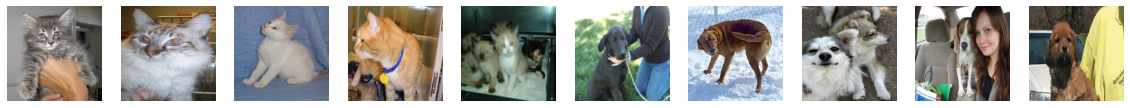

In [ ]:
_, axs = plt.subplots(1,10,figsize=(20,20))
for index, img_name in enumerate(os.listdir(TEST_PATH)):
  img_path = os.path.join(TEST_PATH, img_name)
  img = image.load_img(img_path, target_size=(224, 224))
  axs[index].grid('off')
  axs[index].axis('off')
  axs[index].imshow(img)
plt.show()

Các hàm hỗ trợ cho việc search

In [ ]:
def get_image_from_index(image_number):
  for i, img in enumerate(os.listdir(TEST_PATH)):
    path = os.path.join(TEST_PATH, img)
    if i == image_number:
      img = image.load_img(path, target_size=(224, 224))
      plt.imshow(img)
      plt.title('Input image')
      return img

def search_image(img):
  img_data = image.img_to_array(img)
  # convert shape from (image_width, image_height, channel) to (1, image_width, image_height, channel)
  img_data = np.expand_dims(img_data, axis=0)
  # scale and resize
  img_data = preprocess_input(img_data)
  # extract feature using vgg16
  extracted_feature = model.predict(img_data)
  # convert from tensor to numpy array
  extracted_feature = np.array(extracted_feature)
  centroid = kmeans.predict(extracted_feature)
  print('Input image belong to centroid:', np.squeeze(centroid))
  print('5 similar images from centroid {}'.format(np.squeeze(centroid)))
  random = np.random.choice(np.where(kmeans.labels_ == np.squeeze(centroid))[0], 5)
  for i in random:
    plt.imshow(img_list[i].astype(np.uint8))
    plt.show()

Ta sẽ chọn ngẫu nhiên 1 tấm hình trong thư mục Test để thử Search.
Thay đổi biến image_number để chọn tấm hình khác

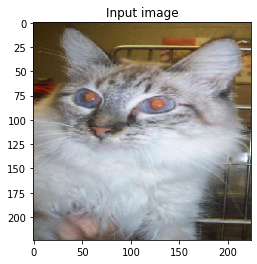

In [ ]:
image_number = 1
img = get_image_from_index(image_number)

Thực hiện search

Input image belong to centroid: 0
5 similar images from centroid 0


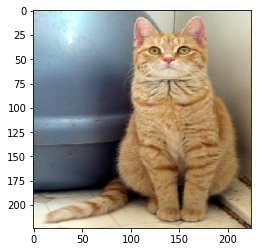

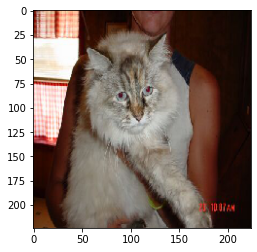

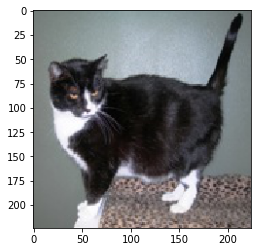

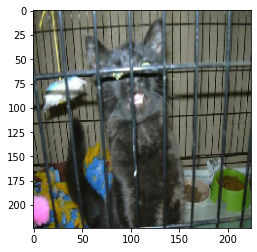

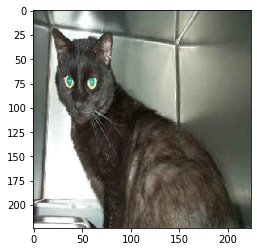

In [ ]:
search_image(img)

## 11.2.2 Similar Faces Clustering

### Chuẩn bị dữ liệu

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

dataset = fetch_olivetti_faces()


Trong class dataset bao gồm


*   data: numpy array với shape (400, 4096) đã được scale
*   target: label của các tấm hình với shape (400,)
*   images: tương ứng với data, nhưng có shape (400, 64, 64) ta sẽ dùng images để tiện cho việc visualize



In [ ]:
X = dataset.data
y = dataset.target
images = dataset.images
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)
print('Shape of images:', images.shape)

Shape of X: (400, 4096)
Shape of y: (400,)
Shape of images: (400, 64, 64)


**Note: X có 4096 features tương đương với X là 1 tấm hình có shape (64, 64)**

In [ ]:
# constants for image height, width
IMG_H = 64
IMG_W = 64 

### [1 Point] Áp dụng PCA


X có tổng cộng 4096 đặc trưng, do đó việc áp dụng K-Means sẽ rất lâu. Nên ta sẽ dùng PCA để giảm chiều dữ liệu trước rồi mới dùng K-Means để phân cụm.

Trước tiên ta cần apply Standard Scaler trước

In [ ]:
# TODO
# 1. Apply StandardScaler on X
# 2. Đặt tên biến mới là X_scale

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scale = scaler.transform(X)


In [ ]:
# TODO
# 1. Khởi tạo PCA với lượng thông tin được giữ lại là 99%
# 2. fit_transform vào X_scale
# 3. Đặt tên biến mới là X_pca

from sklearn.decomposition import PCA

pca = PCA(0.99).fit(X_scale)

X_pca = pca.transform(X_scale)

Ta dùng ``silhouette_score`` để tìm ra **k** tốt nhất, ta sẽ khởi tạo số **k** từ $2$ đến $150$

In [ ]:
# TODO
# 1. import silhouette_score từ sklearn
# 2. import KMeans
# 3. Hoàn thành phần code bên dưới


from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

max_k = 150
model_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_pca)
                for k in range(2, max_k+1)]
silhouettes = [silhouette_score(X_pca, model.labels_)
                     for model in model_per_k]



Vẽ đồ thị 

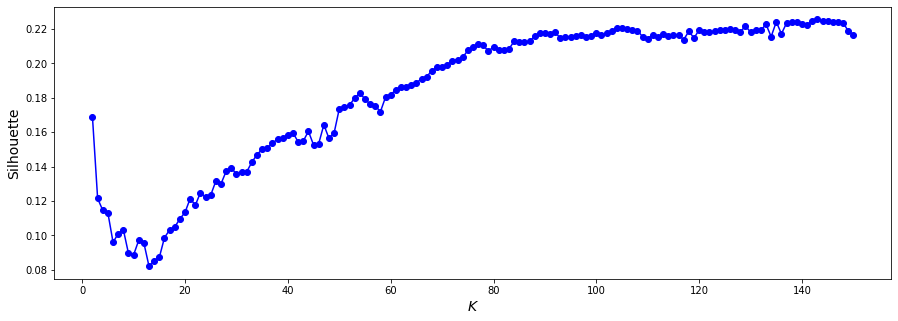

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(range(2, max_k+1), silhouettes, "bo-")
plt.xlabel("$K$", fontsize=14)
plt.ylabel("Silhouette", fontsize=14)
plt.show()

Lấy ra ``best_model`` là model mà tại ``k`` đó ``silhouette_score`` là cao nhất.

Gợi ý:
- Dùng argmax để lấy ra index của giá trị cao nhất trong biến ``silhouettes``
- Dùng index bên trên lấy ra ``best_model`` từ ``model_per_k``

In [ ]:
import numpy as np

max_index = np.argmax(silhouettes)
best_model = model_per_k[max_index]
print('Best k =',best_model.n_clusters)

Best k = 143


Đừng ngạc nhiên vì sao ``k`` lại lớn như vậy. Tuy dataset chỉ có 40 class nhưng các tấm hình bên trong mỗi class được chụp với độ sáng khác nhau và biểu cảm khác nhau.

Cluster 0


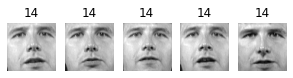

Cluster 1


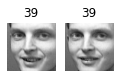

Cluster 2


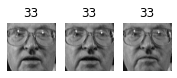

Cluster 3


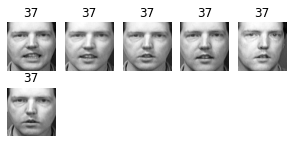

Cluster 4


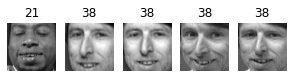

Cluster 5


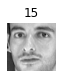

Cluster 6


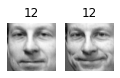

Cluster 7


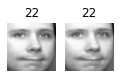

Cluster 8


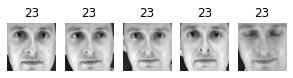

Cluster 9


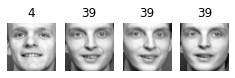

Cluster 10


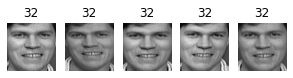

Cluster 11


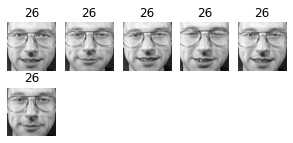

Cluster 12


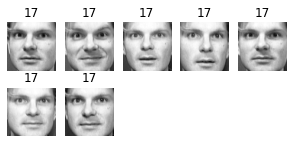

Cluster 13


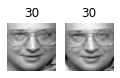

Cluster 14


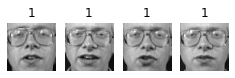

Cluster 15


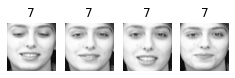

Cluster 16


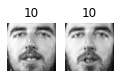

Cluster 17


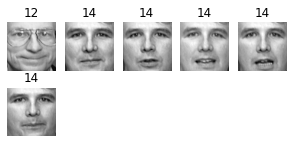

Cluster 18


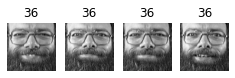

Cluster 19


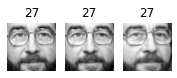

Cluster 20


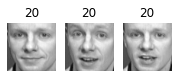

Cluster 21


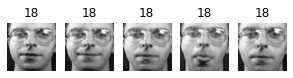

Cluster 22


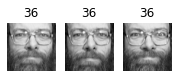

Cluster 23


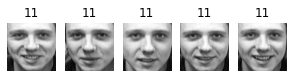

Cluster 24


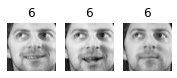

Cluster 25


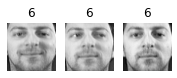

Cluster 26


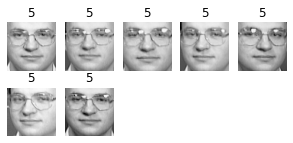

Cluster 27


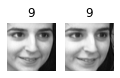

Cluster 28


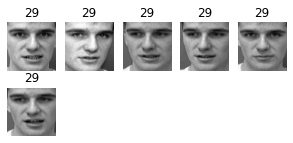

Cluster 29


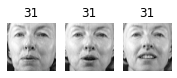

Cluster 30


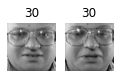

Cluster 31


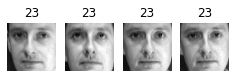

Cluster 32


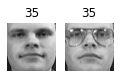

Cluster 33


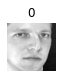

Cluster 34


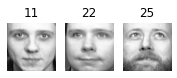

Cluster 35


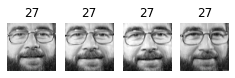

Cluster 36


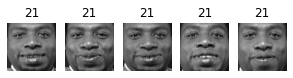

Cluster 37


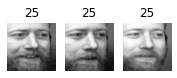

Cluster 38


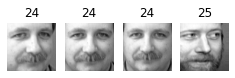

Cluster 39


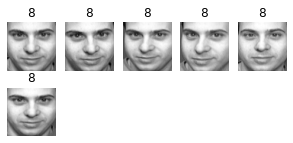

Cluster 40


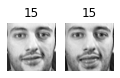

Cluster 41


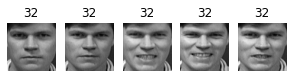

Cluster 42


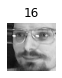

Cluster 43


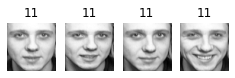

Cluster 44


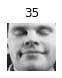

Cluster 45


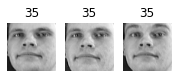

Cluster 46


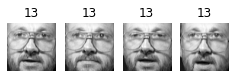

Cluster 47


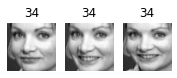

Cluster 48


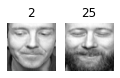

Cluster 49


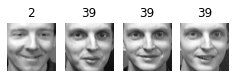

Cluster 50


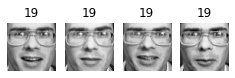

Cluster 51


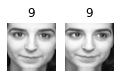

Cluster 52


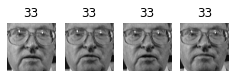

Cluster 53


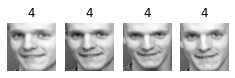

Cluster 54


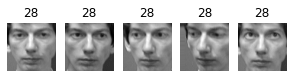

Cluster 55


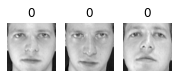

Cluster 56


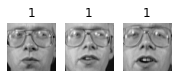

Cluster 57


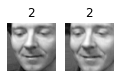

Cluster 58


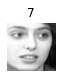

Cluster 59


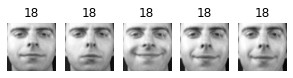

Cluster 60


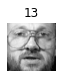

Cluster 61


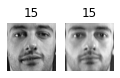

Cluster 62


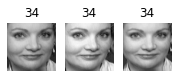

Cluster 63


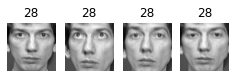

Cluster 64


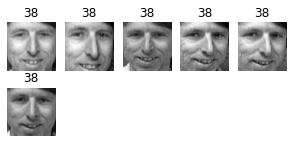

Cluster 65


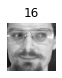

Cluster 66


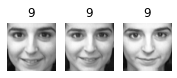

Cluster 67


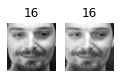

Cluster 68


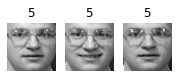

Cluster 69


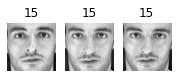

Cluster 70


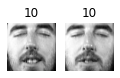

Cluster 71


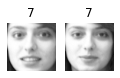

Cluster 72


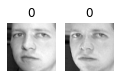

Cluster 73


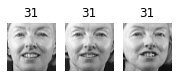

Cluster 74


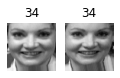

Cluster 75


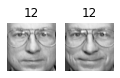

Cluster 76


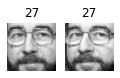

Cluster 77


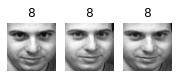

Cluster 78


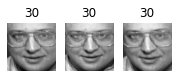

Cluster 79


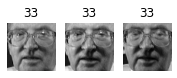

Cluster 80


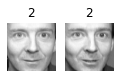

Cluster 81


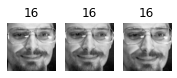

Cluster 82


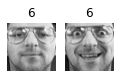

Cluster 83


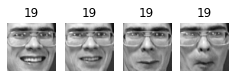

Cluster 84


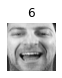

Cluster 85


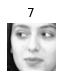

Cluster 86


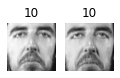

Cluster 87


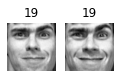

Cluster 88


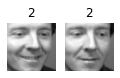

Cluster 89


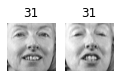

Cluster 90


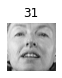

Cluster 91


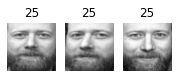

Cluster 92


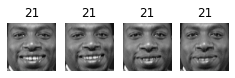

Cluster 93


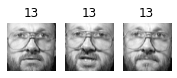

Cluster 94


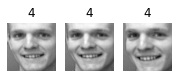

Cluster 95


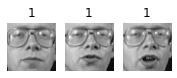

Cluster 96


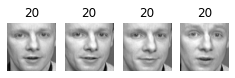

Cluster 97


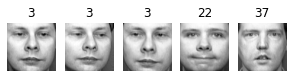

Cluster 98


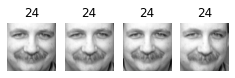

Cluster 99


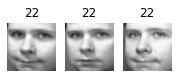

Cluster 100


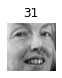

Cluster 101


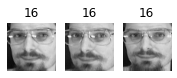

Cluster 102


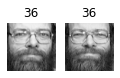

Cluster 103


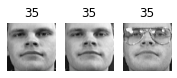

Cluster 104


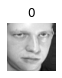

Cluster 105


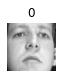

Cluster 106


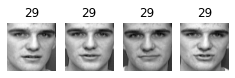

Cluster 107


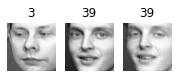

Cluster 108


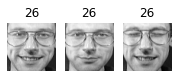

Cluster 109


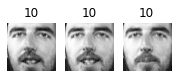

Cluster 110


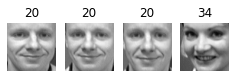

Cluster 111


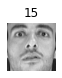

Cluster 112


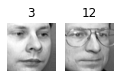

Cluster 113


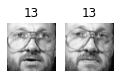

Cluster 114


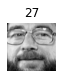

Cluster 115


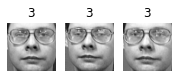

Cluster 116


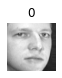

Cluster 117


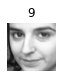

Cluster 118


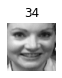

Cluster 119


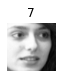

Cluster 120


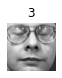

Cluster 121


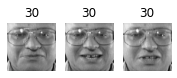

Cluster 122


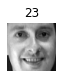

Cluster 123


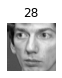

Cluster 124


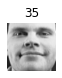

Cluster 125


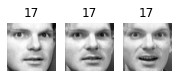

Cluster 126


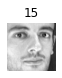

Cluster 127


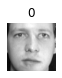

Cluster 128


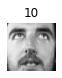

Cluster 129


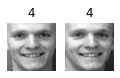

Cluster 130


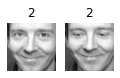

Cluster 131


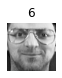

Cluster 132


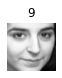

Cluster 133


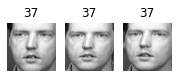

Cluster 134


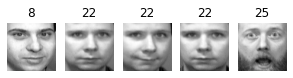

Cluster 135


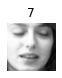

Cluster 136


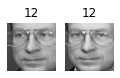

Cluster 137


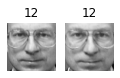

Cluster 138


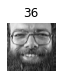

Cluster 139


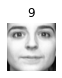

Cluster 140


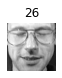

Cluster 141


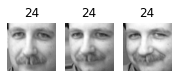

Cluster 142


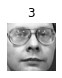

In [ ]:
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X[in_cluster].reshape(-1, 64, 64)
    labels = y[in_cluster]
    plot_faces(faces, labels)